In [1]:
import pandas as pd
import numpy as np

In [149]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt


In [172]:
#this function takes all the numerical features and deals with the high and low outliers
def moniakq(df):
    num_feat = df.select_dtypes(include='number').columns.tolist()
    for feat in num_feat:
        q1 = df[feat].quantile(0.25)
        q3 = df[feat].quantile(0.75)
        iqr = q3-q1
        outer_fence = 1.5*iqr
        outer_fence_le = q1-outer_fence
        outer_fence_ue = q3+outer_fence
        df.loc[df[feat]>outer_fence_ue,feat]=outer_fence_ue
        df.loc[df[feat]<outer_fence_le,feat]=outer_fence_le
    return df

    

In [47]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

#### Outliers function testing

In [167]:
df1=train_df[['LotFrontage','LotArea','MSZoning']]

In [168]:
df1.head()

,LotFrontage,LotArea,MSZoning
0,65.0,8450,RL
1,80.0,9600,RL
2,68.0,11250,RL
3,60.0,9550,RL
4,84.0,14260,RL


In [169]:
df2=moniakq(df1)

In [170]:
df2

,LotFrontage,LotArea,MSZoning
0,65.0,8450.0,RL
1,80.0,9600.0,RL
2,68.0,11250.0,RL
3,60.0,9550.0,RL
4,84.0,14260.0,RL
...,...,...,...
1455,62.0,7917.0,RL
1456,85.0,13175.0,RL
1457,66.0,9042.0,RL
1458,68.0,9717.0,RL


<AxesSubplot: >

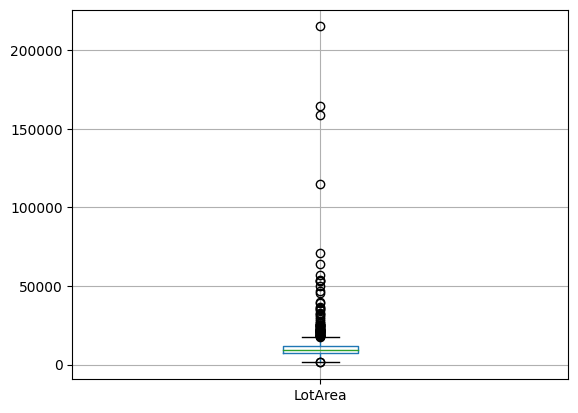

In [224]:
train_df.boxplot(column=['LotArea'])

<AxesSubplot: >

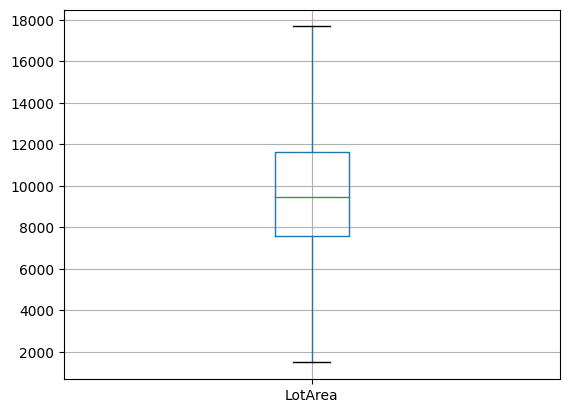

In [223]:
df2.boxplot(column=['LotArea'])

#### Feature engineering

In [49]:
train_df.shape

(1460, 81)

In [175]:
X=train_df.drop(columns=['SalePrice'])
y=train_df['SalePrice']

In [176]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [177]:
X=moniakq(X)

<AxesSubplot: >

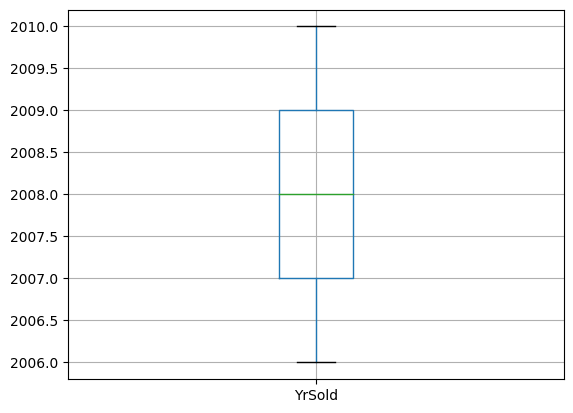

In [226]:
X.boxplot(column=['YrSold'])

In [178]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2.0,2008,WD,Normal
1,2.0,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5.0,2007,WD,Normal
2,3.0,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9.0,2008,WD,Normal
3,4.0,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2.0,2006,WD,Abnorml
4,5.0,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12.0,2008,WD,Normal


In [179]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [180]:
#Looking for NaN
isna=X.isna().sum()/X.shape[0]*100

In [181]:
isna[isna>0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

LotFrontage     17.739726   replace with int 0
Alley           93.767123   replace with str no
MasVnrType       0.547945   replace with str None
MasVnrArea       0.547945   replace with int 0
BsmtQual         2.534247   replace with str no
BsmtCond         2.534247   replace with str no
BsmtExposure     2.602740   replace with str no
BsmtFinType1     2.534247   replace with str no
BsmtFinType2     2.602740   replace with str no
Electrical       0.068493   replace with str FuseF
FireplaceQu     47.260274   replace with str no   
GarageType       5.547945   replace with str no
GarageYrBlt      5.547945   replace with 0
GarageFinish     5.547945   replace with str no
GarageQual       5.547945   replace with str no
GarageCond       5.547945   replace with str no
PoolQC          99.520548   drop
Fence           80.753425   replace with str no
MiscFeature     96.301370   drop

<AxesSubplot: >

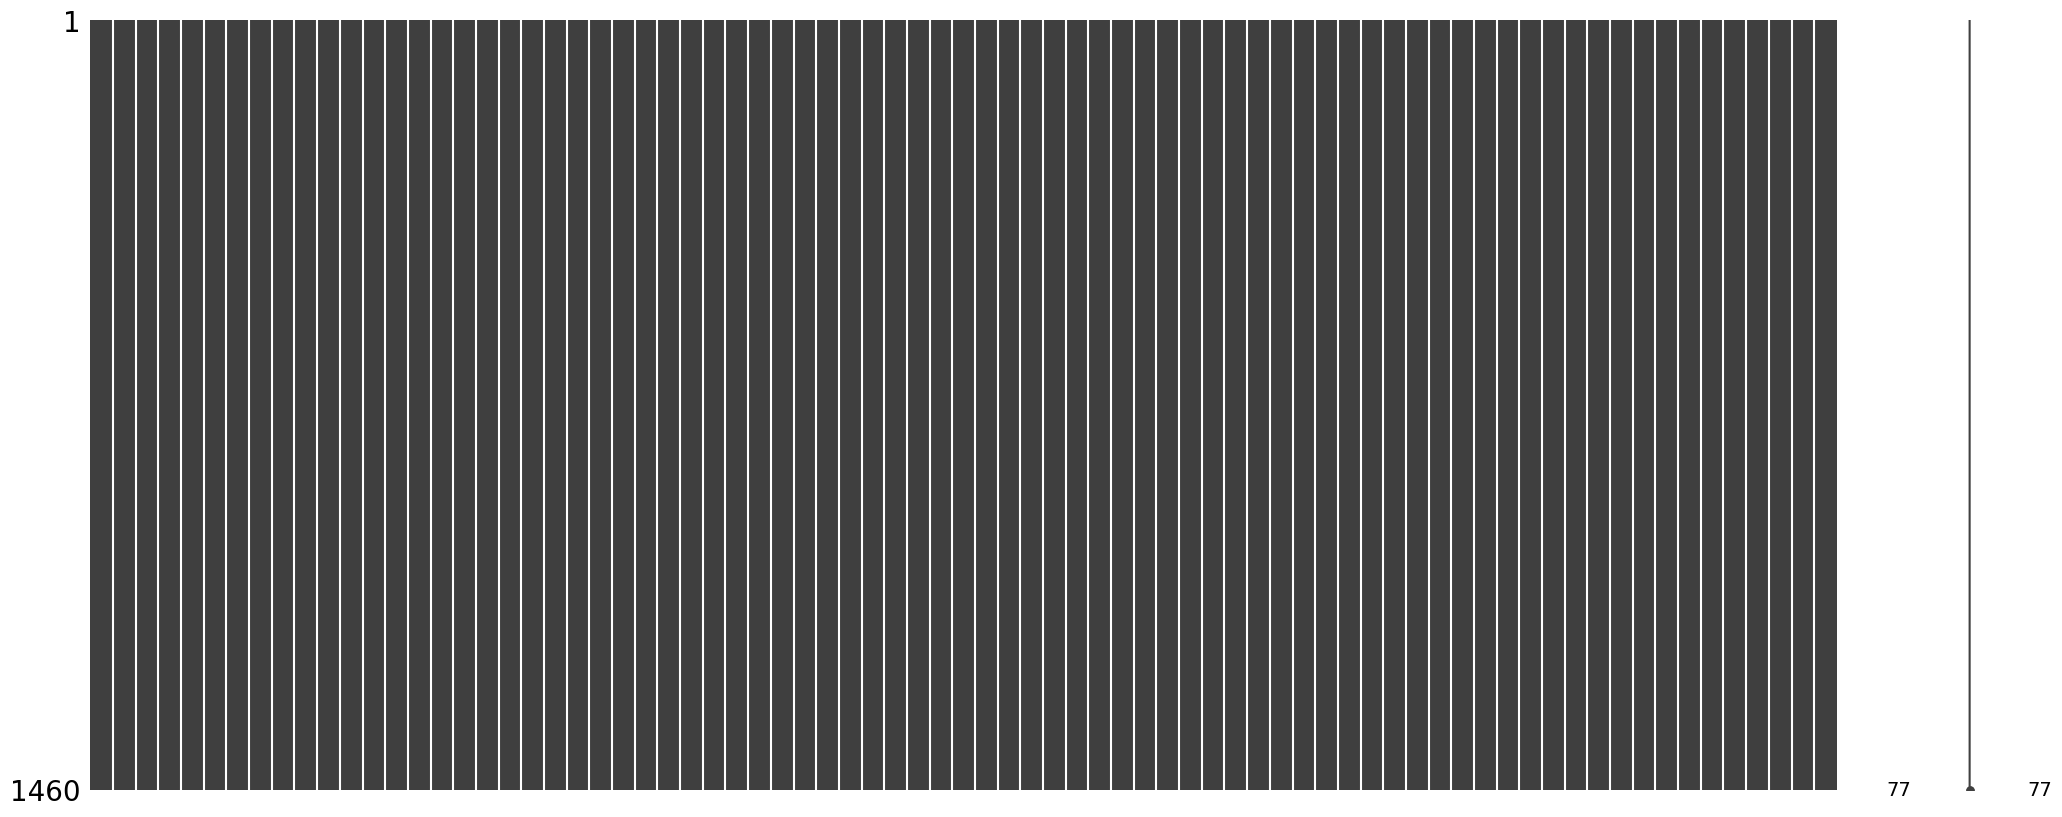

In [185]:
import missingno as msno
%matplotlib inline
msno.matrix(X)

In [183]:
#Dropping columns with too many NaNs
X = X.drop(columns=['PoolQC','MiscFeature','Id'])

In [184]:

#Imputing values manually given the nature of the data
X['LotFrontage']=X['LotFrontage'].fillna(0)
X['Alley']=X['BsmtQual'].fillna('no')
X['MasVnrType']=X['MasVnrType'].fillna('None')
X['MasVnrArea']=X['MasVnrArea'].fillna(0)
X['BsmtQual']=X['BsmtQual'].fillna('no')
X['BsmtCond']=X['BsmtCond'].fillna('no')
X['BsmtExposure']=X['BsmtExposure'].fillna('no')
X['BsmtFinType1']=X['BsmtFinType1'].fillna('no')
X['BsmtFinType2']=X['BsmtFinType2'].fillna('no')
X['Electrical']=X['Electrical'].fillna('FuseF')
X['FireplaceQu']=X['FireplaceQu'].fillna('no')
X['GarageType']=X['GarageType'].fillna('no')
X['GarageYrBlt']=X['GarageYrBlt'].fillna(0)
X['GarageFinish']=X['GarageFinish'].fillna('no')
X['GarageQual']=X['GarageQual'].fillna('no')
X['GarageCond']=X['GarageCond'].fillna('no')
X['Fence']=X['Fence'].fillna('no')


In [58]:
isna2=X.isna().sum()/X.shape[0]*100

In [59]:
isna2[isna2>0]

Series([], dtype: float64)

In [186]:
numerical_features = X.select_dtypes(include='number').columns.tolist()
print(f"There are {len(numerical_features)} numerical features: {numerical_features}\n")

string_features = X.select_dtypes(exclude='number').columns.tolist()
print(f"There are {len(string_features)} string features: {string_features}\n")

There are 36 numerical features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

There are 41 string features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Fire

#### Aplying PCA to num features

In [187]:
from sklearn.decomposition import PCA

In [188]:
pca = PCA(n_components=0.999)
X_pca = pca.fit_transform(X[numerical_features]) 

In [189]:
X_pca[1]

array([  39.10624431,  195.18501364,  717.81621495, -235.37799785,
         -7.55535907,  -79.8853436 ,  -78.67629664,  -69.08824539,
        186.17259928,  -71.363098  ])

In [195]:
X_pca=pd.DataFrame(X_pca,columns=['a','b','c','d','e','f','g','h','i','j'])

In [196]:
X_pca

,a,b,c,d,e,f,g,h,i,j
0,1187.209888,-128.742162,-257.068186,-782.589475,-43.312734,-143.185755,73.374403,47.227103,-111.252725,27.044289
1,39.106244,195.185014,717.816215,-235.377998,-7.555359,-79.885344,-78.676297,-69.088245,186.172599,-71.363098
2,-1608.177199,-85.027661,-466.206621,-434.486802,-105.078000,-162.283032,95.653144,6.426838,-113.612671,22.836666
3,100.855812,-127.292575,-556.500150,-218.066293,-189.640653,35.645935,94.066474,-144.346392,-99.867173,-10.721709
4,-4663.337378,-386.628006,-466.220183,-560.250728,40.013215,-175.800704,287.849858,70.989246,24.430002,8.688235
...,...,...,...,...,...,...,...,...,...,...
1455,1728.344573,-396.968161,-559.840890,220.987915,-185.605243,-95.937296,-66.027734,-70.374548,-68.348283,5.581670
1456,-3617.134387,-489.407054,698.628512,66.680033,255.513355,475.153793,-138.124551,33.590524,209.839997,-46.233955
1457,540.171215,-942.847315,-709.530519,-216.903843,209.066009,-41.179714,-370.082260,-2.689490,-88.225122,4.266651
1458,-17.810300,635.898749,130.140809,51.464368,-237.764897,234.590132,-148.868618,28.683945,410.043256,448.922249


In [197]:
X_str=X[string_features]

In [198]:
X_pca=X_pca.join(X_str)

In [194]:
X_pca

array([[ 1187.20988812,  -128.74216191,  -257.06818576, ...,
           47.22710301,  -111.25272483,    27.04428933],
       [   39.10624431,   195.18501364,   717.81621495, ...,
          -69.08824539,   186.17259928,   -71.363098  ],
       [-1608.17719863,   -85.02766139,  -466.20662148, ...,
            6.42683792,  -113.61267129,    22.83666601],
       ...,
       [  540.1712147 ,  -942.84731462,  -709.53051893, ...,
           -2.68948987,   -88.22512239,     4.2666511 ],
       [  -17.81029986,   635.89874921,   130.14080895, ...,
           28.68394503,   410.04325635,   448.92224936],
       [ -286.86180619,   325.48476316,   629.17156983, ...,
            9.99823712,   349.88608884,    52.92749459]])

#### Train / Test Split

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1168, 77) (292, 77) (1168,) (292,)


In [202]:
X_train_p, X_test_p, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=2022)

print(X_train_p.shape, X_test_p.shape, y_train.shape, y_test.shape)

(1168, 51) (292, 51) (1168,) (292,)


In [203]:
numerical_features = X_train.select_dtypes(include='number').columns.tolist()
print(f"There are {len(numerical_features)} numerical features: {numerical_features}\n")

numerical_features_p = X_train_p.select_dtypes(include='number').columns.tolist()
print(f"There are {len(numerical_features_p)} numerical features: {numerical_features}\n")

string_features = X_train.select_dtypes(exclude='number').columns.tolist()
print(f"There are {len(string_features)} string features: {string_features}\n")

There are 36 numerical features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

There are 10 numerical features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3

#### Applying transformations

In [204]:
# Pipeline for numeric features
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
  ]
)

# Pipeline for string features
string_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ('scale', StandardScaler())
  ]
)

# Now let's merge both pipeline into one single pre-processing object
# We can use ColumnTransformer for this
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features),
    ('string', string_pipeline, string_features)
  ]
)

full_processor_p = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features_p),
    ('string', string_pipeline, string_features)
  ]
)

In [205]:
X_train = full_processor.fit_transform(X_train)
X_test  = full_processor.transform(X_test)

print(X_train.shape, X_test.shape)

(1168, 290) (292, 290)


/home/manuelquiros/Documents/VENVS/KaggleTitanic/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [206]:
enc_cat_features = full_processor.named_transformers_['string']['encode'].get_feature_names_out()

In [207]:
enc_cat_features

array(['x0_C (all)', 'x0_FV', 'x0_RH', 'x0_RL', 'x0_RM', 'x1_Grvl',
       'x1_Pave', 'x2_Ex', 'x2_Fa', 'x2_Gd', 'x2_TA', 'x2_no', 'x3_IR1',
       'x3_IR2', 'x3_IR3', 'x3_Reg', 'x4_Bnk', 'x4_HLS', 'x4_Low',
       'x4_Lvl', 'x5_AllPub', 'x5_NoSeWa', 'x6_Corner', 'x6_CulDSac',
       'x6_FR2', 'x6_FR3', 'x6_Inside', 'x7_Gtl', 'x7_Mod', 'x7_Sev',
       'x8_Blmngtn', 'x8_Blueste', 'x8_BrDale', 'x8_BrkSide',
       'x8_ClearCr', 'x8_CollgCr', 'x8_Crawfor', 'x8_Edwards',
       'x8_Gilbert', 'x8_IDOTRR', 'x8_MeadowV', 'x8_Mitchel', 'x8_NAmes',
       'x8_NPkVill', 'x8_NWAmes', 'x8_NoRidge', 'x8_NridgHt',
       'x8_OldTown', 'x8_SWISU', 'x8_Sawyer', 'x8_SawyerW', 'x8_Somerst',
       'x8_StoneBr', 'x8_Timber', 'x8_Veenker', 'x9_Artery', 'x9_Feedr',
       'x9_Norm', 'x9_PosA', 'x9_PosN', 'x9_RRAe', 'x9_RRAn', 'x9_RRNe',
       'x9_RRNn', 'x10_Artery', 'x10_Feedr', 'x10_Norm', 'x10_PosN',
       'x10_RRAe', 'x10_RRAn', 'x10_RRNn', 'x11_1Fam', 'x11_2fmCon',
       'x11_Duplex', 'x11_Twnhs',

In [208]:
X_train_p = full_processor_p.fit_transform(X_train_p)
X_test_p = full_processor_p.transform(X_test_p)

print(X_train_p.shape, X_test_p.shape)

(1168, 264) (292, 264)


/home/manuelquiros/Documents/VENVS/KaggleTitanic/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Models

#### Baseline

In [209]:
LR = LinearRegression()

In [215]:
LR.fit(X_train,y_train)

LinearRegression()

In [213]:
LR_train_p_pred=LR.predict(X_train_p)

In [216]:
LR_train_pred=LR.predict(X_train)

In [214]:
print('MSE con PCA=' , mean_squared_error(y_train,LR_train_p_pred, squared=False))

MSE con PCA= 21990.22347872583


In [218]:
print('MSE sin PCA=' , mean_squared_error(y_train,LR_train_pred, squared=False))

MSE sin PCA= 19811.15297082242


In [219]:
LR_test_pred=LR.predict(X_test)

In [220]:
print('MSE sin PCA=' , mean_squared_error(y_test,LR_test_pred, squared=False))

MSE sin PCA= 4.200137423866048e+16


#### Random Forest Regressor

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
param_grid = {

    'max_depth': [100],
    'max_features': [0.6,0.7,0.8],
    'min_samples_leaf': [3,  5],
    'min_samples_split': [8,12],
    'n_estimators': [100]
}
rf = RandomForestRegressor(criterion='squared_error')
grid_search_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [227]:
grid_search_rf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=100, max_features=0.6, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.9s
[CV] END max_depth=100, max_features=0.6, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.9s
[CV] END max_depth=100, max_features=0.6, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END max_depth=100, max_features=0.6, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END max_depth=100, max_features=0.6, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV] END max_depth=100, max_features=0.6, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV] END max_depth=100, max_features=0.6, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV] END max_depth=100, max_features=0.6, min_samples_leaf=3, min_samples_split=12, n_estimators=

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [100], 'max_features': [0.6, 0.7, 0.8],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [8, 12], 'n_estimators': [100]},
             verbose=2)

In [125]:
grid_search_rf.best_estimator_

RandomForestRegressor(max_depth=100, max_features=0.6, min_samples_leaf=3,
                      min_samples_split=8)

In [260]:
RF = RandomForestRegressor(max_depth=100, max_features=0.6, min_samples_leaf=3,min_samples_split=8)

In [261]:
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=100, max_features=0.6, min_samples_leaf=3,
                      min_samples_split=8)

In [228]:
y_train_pred_rf=grid_search_rf.predict(X_train)

In [229]:
print('MSE train RandomForest=' , mean_squared_error(y_train,y_train_pred_rf, squared=False))

MSE train RandomForest= 17563.839342752875


In [230]:
y_test_pred_rf=grid_search_rf.predict(X_test)

In [231]:
print('MSE test RandomForest=' , mean_squared_error(y_test,y_test_pred_rf, squared=False))

MSE test RandomForest= 27705.266149294926


In [ ]:
enc_cat_features = full_processor.named_transformers_['string']['encode'].get_feature_names_out()

In [263]:
RF.feature_importances_

array([1.91879100e-03, 4.48059011e-03, 1.38011041e-02, 3.89693254e-01,
       3.02515104e-03, 2.91240226e-02, 9.47581288e-03, 4.32415933e-03,
       2.25564849e-02, 0.00000000e+00, 3.83562705e-03, 3.35844516e-02,
       3.15148626e-02, 1.45902787e-02, 0.00000000e+00, 1.24957792e-01,
       1.12600216e-03, 0.00000000e+00, 1.20894740e-02, 5.71928739e-04,
       2.43974059e-03, 0.00000000e+00, 5.86286865e-03, 5.23469599e-03,
       4.40670535e-03, 1.44158893e-01, 1.84591361e-02, 4.54459504e-03,
       3.90609045e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.03006408e-03, 1.42156707e-03,
       1.19562204e-04, 1.73718178e-05, 2.72404570e-06, 1.02598393e-03,
       1.15274981e-03, 0.00000000e+00, 0.00000000e+00, 9.30537337e-03,
       2.43977015e-05, 1.34204369e-03, 1.19586444e-03, 2.01105605e-05,
       5.34228235e-04, 3.91002367e-04, 0.00000000e+00, 6.23705377e-04,
       2.06393617e-04, 2.64243193e-04, 1.86191392e-04, 1.32003081e-03,
      

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

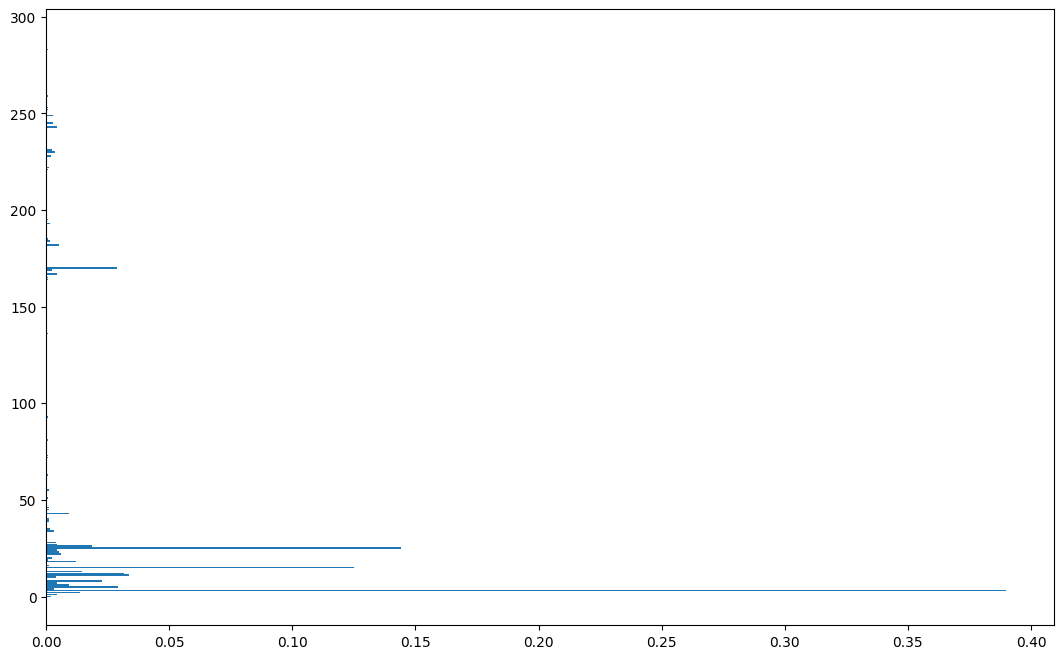

In [264]:
plt.figure(figsize=(13, 8))
caract = X_train.shape[1]
plt.barh(range(caract), RF.feature_importances_)
plt.yticks(np.arange(caract), X_train.columns)
plt.xlabel('Features Importance')
plt.ylabel('Features')
plt.title('Features Importance', fontsize=20)
plt.show()

#### XGboost

In [135]:
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer

In [254]:
param_dist = {
    'n_estimators':[5,6,7,8],
    'max_depth':[20,30,35], 
    'learning_rate':[0.3,0.4,0.5],
    }
#Create the lgbm moodel object
bst = XGBRegressor(reg_lambda=2,reg_alpha=1)
#Create the GridSearch object
bst_grid = GridSearchCV(bst, param_dist,cv = 5, n_jobs = -1, verbose = 2)

In [255]:
bst_grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=5; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=5; total time=   0.2s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=6; total time=   0.2s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=5; total time=   0.2s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=5; total time=   0.2s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=7; total time=   0.2s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=5; total time=   0.2s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=6; total time=   0.2s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=6; total time=   0.3s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=6; total time=   0.3s[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=7; total time=   0.3s

[CV] END ....learning_rate=0.3, max_depth=20, n

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.4, 0.5],
                         'max_depth': [20, 30, 35],
                         'n_estimators': [5, 6, 7, 8]},
             verbose=2)

In [256]:
bst_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=35, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=8, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [257]:
bst_train_pred=bst_grid.predict(X_train)
bst_test_pred=bst_grid.predict(X_test)

In [258]:
print('MSE train XGBoost=' , mean_squared_error(y_train,bst_train_pred, squared=False))
print('MSE test XGBoost=' , mean_squared_error(y_test,bst_test_pred, squared=False))

MSE train XGBoost= 5705.392548953097
MSE test XGBoost= 32273.302977241212


In [241]:
bst_train_pred2=bst_grid2.predict(X_train)
bst_test_pred2=bst_grid2.predict(X_test)
print('MSE2 train XGBoost=' , mean_squared_error(y_train,bst_train_pred2, squared=False))
print('MSE2 test XGBoost=' , mean_squared_error(y_test,bst_test_pred2, squared=False))

MSE2 train XGBoost= 8011.072273200967
MSE2 test XGBoost= 31303.222218650364
